In [66]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
df = pd.read_csv("NBA.Stats.csv")

In [68]:
df.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C,30.2,6,41.4,35.7,15.8,78,...,5.7,1.2,1.5,4.2,43.8,38.7,49.5,12.2,117.1,108.0
1,2,Jalen Brunson,Nyk,G,27.8,13,39.8,36.4,9.3,120,...,7.5,0.8,0.2,2.7,35.7,39.8,43.2,9.3,114.8,114.7
2,3,Damian Lillard,Mil,G,33.9,4,39.1,31.4,10.0,38,...,5.0,1.0,0.0,2.3,34.5,36.3,39.5,8.2,127.6,115.7
3,4,Shai Gilgeous-Alexander,Okc,G,25.9,10,39.9,32.3,8.9,81,...,6.4,1.3,1.7,2.2,37.4,36.6,43.8,11.2,118.3,106.9
4,5,Tyrese Maxey,Phi,G,23.6,6,44.6,28.1,8.6,28,...,6.8,0.8,0.3,2.2,35.0,36.7,41.8,9.1,120.9,113.3


In [69]:
numerical_columns = []
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [70]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_columns),
    ("cat", OneHotEncoder(), categorical_columns)
])

In [71]:
X = preprocessor.fit_transform(df)


In [72]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    diff = inertias[-2] - inertias[-1] if k > 1 else 0
    print(f'K={k}, Inercia = {kmeans.inertia_:,.6f} - Diferencia = {diff:,.6f}')

K=1, Inercia = 6,101.699531 - Diferencia = 0.000000
K=2, Inercia = 4,194.594977 - Diferencia = 1,907.104554
K=3, Inercia = 3,557.331750 - Diferencia = 637.263227
K=4, Inercia = 3,231.830668 - Diferencia = 325.501082
K=5, Inercia = 3,081.218692 - Diferencia = 150.611977
K=6, Inercia = 2,909.843836 - Diferencia = 171.374856
K=7, Inercia = 2,763.918244 - Diferencia = 145.925592
K=8, Inercia = 2,665.279161 - Diferencia = 98.639083
K=9, Inercia = 2,597.133172 - Diferencia = 68.145989
K=10, Inercia = 2,509.246225 - Diferencia = 87.886947


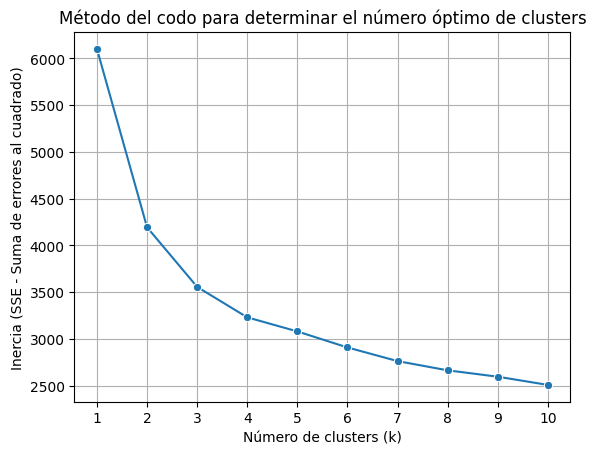

In [73]:
sns.lineplot(x=range(1, 11), y=inertias, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (SSE - Suma de errores al cuadrado)")
plt.title("Método del codo para determinar el número óptimo de clusters")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [74]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
df["Cluster"] = kmeans.labels_
df.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg,Cluster
0,1,Joel Embiid,Phi,C,30.2,6,41.4,35.7,15.8,78,...,1.2,1.5,4.2,43.8,38.7,49.5,12.2,117.1,108.0,2
1,2,Jalen Brunson,Nyk,G,27.8,13,39.8,36.4,9.3,120,...,0.8,0.2,2.7,35.7,39.8,43.2,9.3,114.8,114.7,2
2,3,Damian Lillard,Mil,G,33.9,4,39.1,31.4,10.0,38,...,1.0,0.0,2.3,34.5,36.3,39.5,8.2,127.6,115.7,2
3,4,Shai Gilgeous-Alexander,Okc,G,25.9,10,39.9,32.3,8.9,81,...,1.3,1.7,2.2,37.4,36.6,43.8,11.2,118.3,106.9,2
4,5,Tyrese Maxey,Phi,G,23.6,6,44.6,28.1,8.6,28,...,0.8,0.3,2.2,35.0,36.7,41.8,9.1,120.9,113.3,2


In [75]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

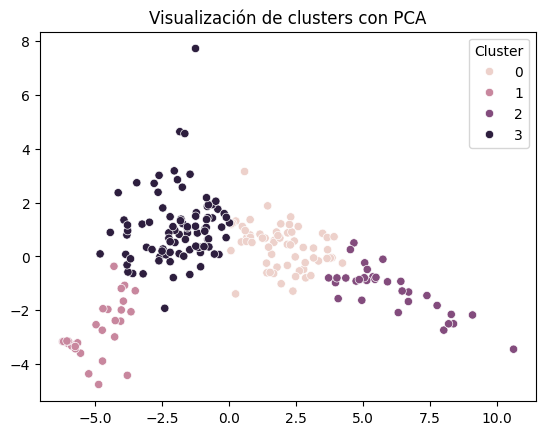

In [76]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"])
plt.title("Visualización de clusters con PCA")
plt.show()

In [77]:
df["Cluster"].value_counts()

Cluster
3    89
0    63
2    32
1    29
Name: count, dtype: int64

In [78]:
df[numerical_columns + ["Cluster"]].groupby("Cluster").mean()


,RANK,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
Cluster,,,,,,,,,,,,,,,,,,,,,
0,64.174603,28.376190,9.507937,30.166667,17.677778,12.001587,18.952381,0.783825,50.206349,0.526238,...,2.312698,0.798413,0.658730,1.295238,16.900000,13.923810,19.203175,6.563492,115.271429,108.971429
1,197.724138,26.724138,3.379310,3.613793,15.358621,18.379310,0.931034,0.178172,1.551724,0.083724,...,0.286207,0.096552,0.055172,0.258621,1.065517,0.589655,1.355172,1.896552,16.600000,33.596552
2,17.437500,28.687500,10.593750,38.768750,27.243750,12.143750,53.062500,0.829313,125.343750,0.534156,...,5.406250,1.096875,0.696875,2.553125,31.081250,29.431250,36.487500,9.656250,116.118750,109.540625
3,139.955056,27.277528,6.685393,11.380899,15.606742,11.313483,3.932584,0.471607,10.797753,0.534011,...,0.677528,0.306742,0.193258,0.400000,5.114607,4.022472,5.788764,4.687640,97.574157,95.504494


In [79]:
df[categorical_columns + ["Cluster"]].groupby("Cluster").agg(lambda x: x.mode()[0])


,NAME,TEAM,POS
Cluster,,,
0,Aaron Gordon,Nor,G
1,Bol Bol,Min,F
2,Anthony Davis,Bos,G
3,A.J. Lawson,Orl,G


<Axes: xlabel='Cluster', ylabel='2PA'>

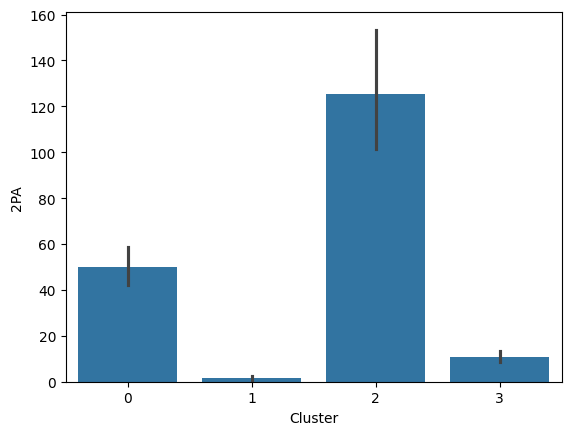

In [80]:
sns.barplot(df, x="Cluster", y="2PA", estimator="mean")


<Axes: xlabel='Cluster', ylabel='3PA'>

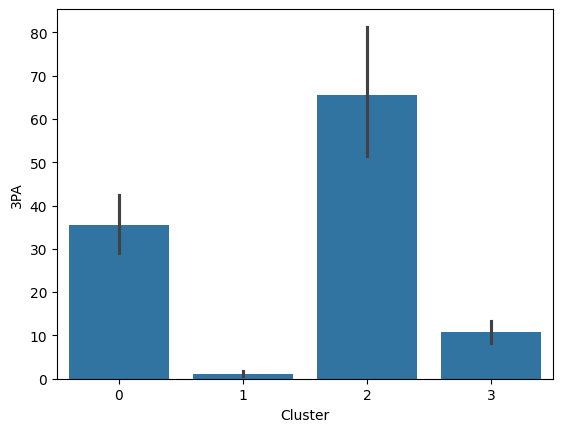

In [81]:
sns.barplot(df, x="Cluster", y="3PA", estimator="mean")


<Axes: xlabel='Cluster', ylabel='3P%'>

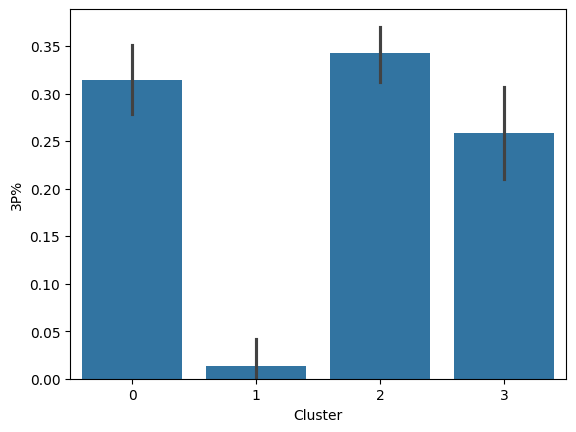

In [82]:
sns.barplot(df, x="Cluster", y="3P%", estimator="mean")


<Axes: xlabel='Cluster', ylabel='2P%'>

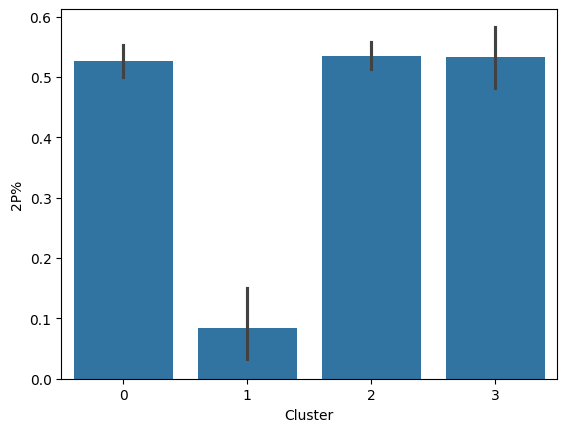

In [83]:
sns.barplot(df, x="Cluster", y="2P%", estimator="mean")
